# Parte I: Preparación de datos

En este cuaderno nos dedicaremos a crear los datos estáticos y meteorológicos para ejecutar el modelo [COSIPY](https://cryo-tools.org/tools/cosipy/).

Primero, importamos las dependencias necesarias .


```{note}
Antes de ejecutar todo los ejercicios, asegúrate de activar el ambiente cosipy en el terminal usando.
```

```bash
christian@hp:~$ conda activate cosipy
```

## Creando el archivo estático

COSIPY viene con el script create_static_file.py ubicado en la carpeta de **utilities**. Este script ejecuta algunas rutinas `gdal` en la línea de comandos. Este script solo es para usuarios de UNIX y MAC en este momento. El script crea algunos archivos NetCDF intermedios (dem.nc, aspect.nc, mask.nc y slope.nc) que se eliminan automáticamente después de que se crea el archivo estático.

Aquí utilizamos un DEM y un shapefile que deben localizarse en la carpeta /data/static. El archivo estático se crea mediante:


```bash
christian@hp:~$ cd cosipy/utilities/createStatic/
christian@hp:~$ python create_static_file.py
```

El comando crea un nuevo archivo **Chuecon_static_90_test.nc** en la carpeta /data/static. Los nombres y las rutas de los archivos se pueden cambiar fácilmente en el script de Python.

## Procesar datos ERA5

COSIPY necesita de datos meteorológicos que incluyen radiación solar, temperatura, precipitación, velocidad del viento, presión y humedad relativa a alta resolución temporal (1 hora). Sin embargo, no siempre estos datos están disponibles en las estaciones meteorológicas. En ese sentido, el uso de datos de reanálisis como ERA5 se pueden utilizar.

ERA5 es el quinto reanálisis atmosférico importante producido por ECMWF, después del reanálisis del FGGE, ERA-15, ERA-40 y ERA-Interim. El conjunto de datos ERA5 proporciona datos horarios sobre parámetros de superficie y altitud con una resolución global de aproximadamente 31 km en 137 niveles que alcanzan hasta 1 Pa. También incluye los 10 miembros del sistema de asimilación de datos 4D-Var utilizado para producir el reanálisis, en resolución reducida (3 horas, 63 km). 

Actualmente, ERA5 están disponibles desde 1940, disponibles en [Climate Data Store](https://cds-beta.climate.copernicus.eu/). ERA5 reemplaza el reanálisis ERA-Interim.

<img src='./img/er5_reanalisis_data.jpg' width='500'>

### Ventajas de **ERA5**
* Mayor resolución temporal y espacial. Esto es evidente en la representación de eventos climáticos extremos como el huracanes.

* Disponible desde 1940 en adelante con actualizaciones diarias cercanas al tiempo real.

* Una mejor representación de la circulación troposférica a lo largo del período de observación moderno a partir de 1979, como lo indica la evolución de la habilidad de pronóstico en la Figura 2 de [Bell et al. (2021)](https://doi.org/10.1002/qj.4174).

Representación del huracán Florence (septiembre de 2018) en ERA5 (izquierda) y ERA-Interim (derecha).
<img src='./img/Dee-F1.png' width='800'>

Primero debemos descargar los datos de ERA5 con las variables necesarias y para el area del glaciar. Para el taller, hemos descargado los datos de ERA5 y se encuentran en la carpeta /data/input/ERA5/.

Hemos disponibilizado un script que preprocesa los datos de ERA5 en la carpeta /utilities/ERA5_preprocessing.

Los datos de ERA5 se preprocesarán mediante:

```bash
christian@hp:~$ cd cosipy/utilities/ERA5_preprocessing/
christian@hp:~$ python downscaling_era5_Chuecon.py
```

El comando crea un archivo **Chuecon_ERA5.csv** en la carpeta data/input/Taller.

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('cosipy/data/input/Taller/Chuecon_ERA5.csv', sep=',', 
                  index_col=['TIMESTAMP'], parse_dates=['TIMESTAMP'])
df

,G,LWin,T2,RH2,U2,RRR,PRES,N
TIMESTAMP,,,,,,,,
2020-01-01 00:00:00,8.047201,301.47305,273.13720,93.533180,2.087125,0.000000,540.294556,0.995568
2020-01-01 06:00:00,0.000000,263.11230,271.45508,99.468650,0.785650,0.000000,540.542541,0.992539
2020-01-01 12:00:00,90.144720,285.07672,269.94530,91.276985,0.245987,0.000000,540.694468,1.000000
2020-01-01 18:00:00,1007.282500,273.13107,277.23950,56.940365,3.041128,0.524322,540.017951,0.971275
2020-01-02 00:00:00,9.491558,292.96222,272.75050,93.255160,1.077859,0.000000,540.208641,0.982599
...,...,...,...,...,...,...,...,...
2021-12-30 18:00:00,592.194700,339.09778,277.59130,91.808174,0.914405,0.985646,541.105784,0.971813
2021-12-31 00:00:00,8.538282,308.83722,271.85938,100.000000,0.410424,0.257147,540.403608,0.983621
2021-12-31 06:00:00,0.000000,297.96027,271.46875,99.996170,1.313210,0.000000,540.529930,0.989932


Precipitación anual en mm para 2020
246.19445156399996


<Axes: >

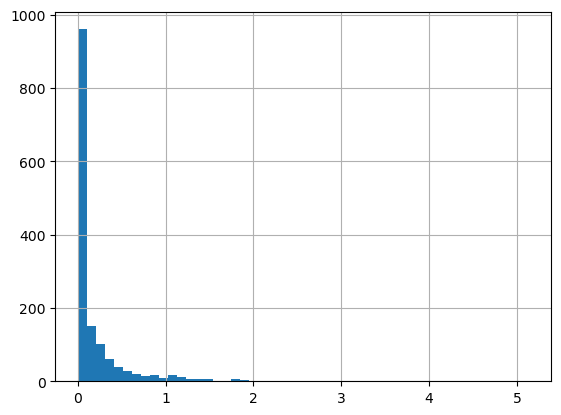

In [10]:
print('Precipitación anual en mm para 2020')
print(df['RRR'].loc['20200101':'20201231'].sum())

df['RRR'].loc['20200101':'20201231'].hist(bins=50)

## Crear el archivo de entrada COSIPY

La creación del archivo de entrada requiere la información estática (archivo) de la sección. Para convertir los datos de una estación meteorológica automática (AWS), utilizamos el script de conversión aws2cosipy.py ubicado en la carpeta /utilities/aws2cosipy. En este caso, usaremos los datos de ERA5 preprocesados previamente. El script viene con un archivo de configuración **aws2cosipyConfig.py** que define la estructura del archivo AWS y otros parámetros definidos por el usuario. Dado que el archivo de entrada proporciona información puntual, los datos se interpolan a través de tasas de caída. Los campos de radiación solar se basan en un modelo sugerido por [Wohlfahrt et al. (2016)](https://doi.org/10.1016/j.agrformet.2016.05.012). Se supone que otras variables como la velocidad del viento y la fracción de cobertura de nubes son constantes en todo el dominio.

El script se ejecuta con:

```bash
christian@hp:~$ cd cosipy/utilities//aws2cosipy/
christian@hp:~$ python aws2cosipy.py -c ../../data/input/Taller/Chuecon_ERA5.csv -o ../../data/input/Taller/Chuecon_ERA5.nc -s ../../data/static/Chuecon_static_90.nc -b 20200101 -e 20201231
```

El comando crea un archivo **Chuecon_ERA5.nc** en la carpeta data/input/Taller.